In [2]:
import numpy as np
import pandas as pd
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from fastai.structured import *
import matplotlib.pyplot as plt
import os
import glob

from numpy import nan as Nan

In [2]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
all_files = glob.glob("*.csv")

In [4]:
#Read all csv files

li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=',', header=1, low_memory=False) #read csv
    li.append(df)

In [5]:
crypto_data = pd.concat(li, axis=0, ignore_index=True)

In [6]:
crypto_data = crypto_data.drop(columns=['Unix Timestamp'])

In [7]:
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])
#crypto_data['Date'] = pd.to_numeric(crypto_data['Date'])

In [8]:
df_btc = crypto_data[crypto_data['Symbol'] == 'BTCUSD']
df_eth = crypto_data[crypto_data['Symbol'] == 'ETHUSD']

In [9]:
df_btc = df_btc.sort_values(by=['Date'], ascending=True)
df_eth = df_eth.sort_values(by=['Date'], ascending=True)

In [10]:
crypto_data = pd.concat([df_btc, df_eth], axis=0, ignore_index=True)

In [11]:
df_btc = df_btc.reset_index(drop = True)
df_eth = df_eth.reset_index(drop = True)

In [12]:
crypto_data['Symbol'].value_counts()

BTCUSD    1745824
ETHUSD    1559257
Name: Symbol, dtype: int64

In [13]:
crypto_data.shape

(3305081, 7)

# Plot BTC and ETH high value

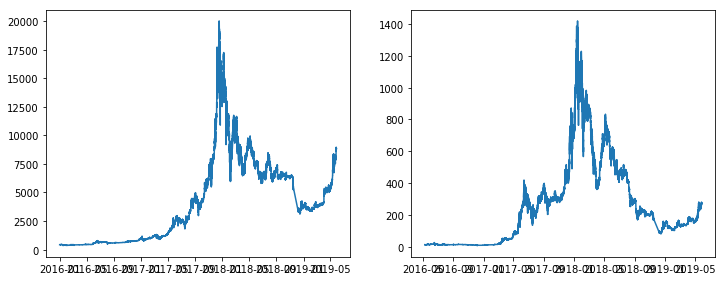

In [57]:
fig = plt.figure(1, figsize=(12,10))
tmp_fig = fig.add_subplot(2,2,1)

plt.plot(crypto_data.iloc[:df_btc.iloc[-1:].index[0], 0], crypto_data.iloc[:df_btc.iloc[-1:].index[0], 3], label="BTC")
tmp_fig = fig.add_subplot(2,2,2)
plt.plot(crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 0], crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 3], label="ETH")

# Plot all BTC,ETH values

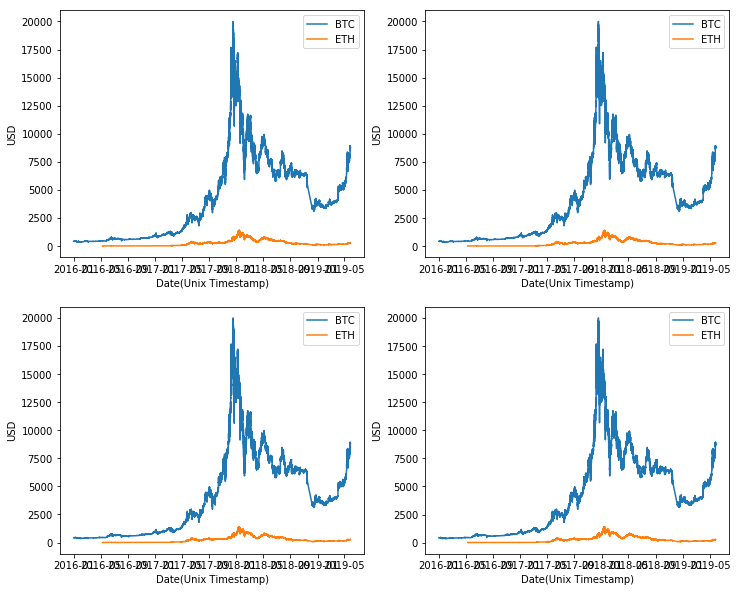

In [53]:
#btc - 30563
#eth - 55991
#ltc - 60059
#zec - 67655

fig = plt.figure(1, figsize=(12,10))
for i in range(2, 6):
    tmp_fig = fig.add_subplot(2,2,i-1)
    plt.plot(crypto_data.iloc[:df_btc.iloc[-1:].index[0], 0], crypto_data.iloc[:df_btc.iloc[-1:].index[0], i], label="BTC") #Open
    plt.plot(crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 0], crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, i], label="ETH")
    plt.legend()
    plt.ylabel('USD')
    plt.xlabel('Date(Unix Timestamp)')

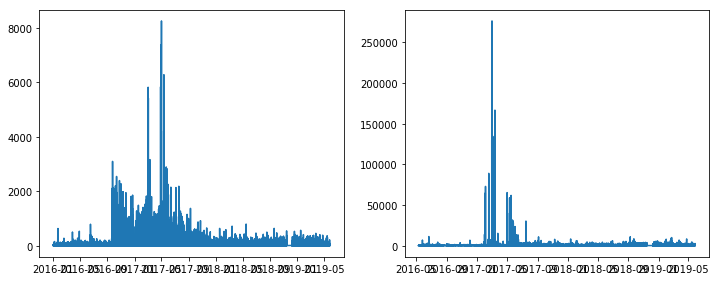

In [60]:
fig2 = plt.figure(1, figsize=(12,10))

tmp_fig = fig2.add_subplot(2,2,1)
plt.plot(crypto_data.iloc[:df_btc.iloc[-1:].index[0], 0], crypto_data.iloc[:df_btc.iloc[-1:].index[0], 6], label="BTC") #Open
tmp_fig = fig2.add_subplot(2,2,2)
plt.plot(crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 0], crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 6], label="ETH")

# Creating df_btc_etc

In [14]:
df_btc.drop(['Symbol'], axis=1, inplace=True, errors='ignore')
df_btc.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-01 00:00:00,429.95,429.95,429.95,429.95,0.0
1,2016-01-01 00:01:00,429.95,429.95,429.95,429.95,0.0
2,2016-01-01 00:02:00,429.95,429.95,429.95,429.95,0.0
3,2016-01-01 00:03:00,429.95,429.95,429.95,429.95,0.0
4,2016-01-01 00:04:00,429.95,429.95,429.95,429.95,0.0


In [15]:
df_eth.drop(['Symbol'], axis=1, inplace=True, errors='ignore')
df_eth.head()

,Date,Open,High,Low,Close,Volume
0,2016-05-09 13:32:00,0.0,12.0,0.0,12.0,4.156276
1,2016-05-09 13:33:00,12.0,12.0,10.0,10.0,43.497506
2,2016-05-09 13:34:00,10.0,10.0,10.0,10.0,8.000000
3,2016-05-09 13:35:00,10.0,10.0,10.0,10.0,60.000000
4,2016-05-09 13:36:00,10.0,10.0,10.0,10.0,0.375000


In [16]:
#sort from same date btc and etc

df_btc = df_btc[df_btc.Date.dt.date > datetime.date(2016, 5, 9)]
df_eth = df_eth[df_eth.Date.dt.date > datetime.date(2016, 5, 9)]

In [17]:
#reset index to 0,1,2,...
df_btc = df_btc.reset_index(drop = True)
df_eth = df_eth.reset_index(drop = True)

In [18]:
#take evry 5 row and reset index
df_btc = df_btc.iloc[::5, :]
df_btc = df_btc.reset_index(drop = True)

df_btc.head()

,Date,Open,High,Low,Close,Volume
0,2016-05-10 00:00:00,460.98,460.98,460.98,460.98,0.43892
1,2016-05-10 00:05:00,460.98,460.98,460.98,460.98,0.00000
2,2016-05-10 00:10:00,460.98,460.98,460.98,460.98,0.03733
3,2016-05-10 00:15:00,460.98,460.98,460.98,460.98,0.00000
4,2016-05-10 00:20:00,460.98,460.98,460.98,460.98,0.00000


In [19]:
df_eth = df_eth.iloc[::5, :]
df_eth = df_eth.reset_index(drop = True)

df_eth.head()

,Date,Open,High,Low,Close,Volume
0,2016-05-10 00:00:00,9.36,9.36,9.36,9.36,0.0
1,2016-05-10 00:05:00,9.36,9.36,9.36,9.36,0.0
2,2016-05-10 00:10:00,9.36,9.36,9.36,9.36,0.0
3,2016-05-10 00:15:00,9.36,9.36,9.36,9.36,0.0
4,2016-05-10 00:20:00,9.36,9.36,9.36,9.36,0.0


In [20]:
df_btc.shape, df_eth.shape

((311725, 6), (311726, 6))

In [21]:
df_btc['Mean'] = (df_btc['High']+df_btc['Low'])/2

In [22]:
df_btc.drop(['Open', 'Close'], axis=1, inplace=True, errors='ignore')

In [23]:
df_btc.head()

,Date,High,Low,Volume,Mean
0,2016-05-10 00:00:00,460.98,460.98,0.43892,460.98
1,2016-05-10 00:05:00,460.98,460.98,0.00000,460.98
2,2016-05-10 00:10:00,460.98,460.98,0.03733,460.98
3,2016-05-10 00:15:00,460.98,460.98,0.00000,460.98
4,2016-05-10 00:20:00,460.98,460.98,0.00000,460.98


In [24]:
df_btc_model = pd.DataFrame()

for index in range(0, df_btc.iloc[-1:].index[0], 12):
    df_tmp_btc = df_btc.iloc[index:index+288]
    df_tmp_btc = pd.DataFrame(df_tmp_btc[['Mean']].values.reshape(1, -1))
    df_tmp_btc['Date'] = df_btc['Date'].dt.date[index]
    
    df_btc_model = df_btc_model.append(df_tmp_btc, ignore_index=True)

    if index >= df_btc.iloc[-288:].index[0]:
        break

C:\Users\Marcin\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [25]:
df_btc_model['Mean_X'] = df_btc_model.iloc[: ,276:288].mean(axis=1)
df_btc_model['Variance_X'] = df_btc_model.iloc[: ,276:288].var(axis=1)
df_btc_model['Min_X'] = df_btc_model.iloc[: ,276:288].values.min(axis=1)
df_btc_model['Max_X'] = df_btc_model.iloc[: ,276:288].values.max(axis=1)
df_btc_model.drop(df_btc_model.iloc[: ,276:288], axis =1, inplace=True)

In [35]:
df_btc_model.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,Date,Mean_X,Variance_X,Min_X,Max_X
0,460.98,460.98,460.98,460.98,460.98,460.98,460.970,460.975,460.98,460.98,...,453.76,453.76,453.76,453.76,453.76,1462838400000000000,452.093333,0.439333,451.75,453.75
1,460.98,460.98,460.98,460.98,461.42,461.43,461.430,462.980,462.98,462.98,...,451.75,451.75,451.75,451.75,451.75,1462838400000000000,451.749167,0.000008,451.74,451.75
2,462.98,462.98,462.98,462.98,462.98,462.98,462.980,462.980,462.98,462.98,...,451.75,451.75,451.75,451.75,451.74,1462838400000000000,451.825000,0.031518,451.74,452.21
3,462.98,462.98,462.98,462.97,462.97,462.98,462.980,462.980,462.98,462.98,...,451.75,451.75,451.75,452.20,452.21,1462838400000000000,452.204167,0.000027,452.20,452.21
4,462.98,462.98,462.97,462.97,462.97,461.79,461.785,461.770,461.77,461.77,...,452.21,452.21,452.21,452.21,452.21,1462838400000000000,452.210000,0.000000,452.21,452.21


In [27]:
df_btc_model.dropna(inplace=True)

In [28]:
df_btc_model['Date'] = pd.to_datetime(df_btc_model['Date'])
df_btc_model['Date'] = pd.to_numeric(df_btc_model['Date'])

In [36]:
df_btc_model.to_pickle("./df_btc_model.pkl")

In [29]:
df = df_btc_model.iloc[:,:-4]
y = df_btc_model.iloc[:,-4:]

In [30]:
def rmse(x,y): return np.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20)

In [32]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
m.score(X_test,y_test)
#print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 8.62 s


0.6357418694128838

In [33]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(df_btc_model, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((23954, 277), (23954, 4), (2000, 277))

In [34]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 8.89 s
[Mean_X          37.223360
Variance_X    3430.563142
Min_X           41.715451
Max_X           36.727294
dtype: float64, Mean_X          220.503750
Variance_X    42127.363350
Min_X           264.921012
Max_X           209.303177
dtype: float64, 0.8893213309467177, -174.78168341448279]


# create df with mean var min max 

In [157]:
df_btc_eth = pd.DataFrame()

for index in range(0, df_btc.iloc[-1:].index[0], 13):
    df_tmp_btc = df_btc.iloc[index:index+13]
    df_tmp_btc = pd.DataFrame(df_tmp_btc[['Open', 'High', 'Low', 'Close']].values.reshape(1, -1))
    df_tmp_btc['Mean_BTC'] = df_tmp_btc.mean(axis=1)
    df_tmp_btc['Variance_BTC'] = df_tmp_btc.var(axis=1)
    df_tmp_btc['Min_BTC'] = df_tmp_btc.iloc[0, :52].values.min()
    df_tmp_btc['Max_BTC'] = df_tmp_btc.iloc[0, :52].values.max()

    df_tmp_eth = df_eth.iloc[index:index+13]
    df_tmp_eth = pd.DataFrame(df_tmp_eth[['Open', 'High', 'Low', 'Close']].values.reshape(1, -1))
    df_tmp_eth['Mean_ETH'] = df_tmp_eth.mean(axis=1)
    df_tmp_eth['Variance_ETH'] = df_tmp_eth.var(axis=1)
    df_tmp_eth['Min_ETH'] = df_tmp_eth.iloc[0, :52].values.min()
    df_tmp_eth['Max_ETH'] = df_tmp_eth.iloc[0, :52].values.max()


    tmp_concat = pd.concat([df_tmp_btc, df_tmp_eth], axis=1)

    tmp_df = df_eth.iloc[index+13:index+13+13]
    tmp_df = pd.DataFrame(tmp_df[['Open', 'High', 'Low', 'Close']].values.reshape(1, -1))
    tmp_concat['Mean_X'] = tmp_df.mean(axis=1)
    tmp_concat['Variance_X'] = tmp_df.var(axis=1)
    tmp_concat['Min_X'] = tmp_df.iloc[0, :52].values.min()
    tmp_concat['Max_X'] = tmp_df.iloc[0, :52].values.max()
    
    df_btc_eth = df_btc_eth.append(tmp_concat, ignore_index=True)
    
    if index >= df_btc.iloc[-24:].index[0]:
        break

    #print(index)

In [187]:
df_btc_eth.shape

(23978, 116)

In [ ]:
df, y ,nas = proc_df(df_btc_eth, df_btc_eth.iloc[:, -4:])

In [175]:
df_btc_eth.columns[-4:].values

array(['Mean_X', 'Variance_X', 'Min_X', 'Max_X'], dtype=object)

In [205]:
df_btc_eth.columns

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,
       ...
                   50,             51,     'Mean_ETH', 'Variance_ETH',
            'Min_ETH',      'Max_ETH',       'Mean_X',   'Variance_X',
              'Min_X',        'Max_X'],
      dtype='object', length=116)

In [204]:
df_btc_eth.to_pickle("./df_btc_eth_mean.pkl")

In [14]:
df_btc_eth = pd.read_pickle("./df_btc_eth_mean.pkl") 

In [177]:
train_cats(df_btc_eth)

In [188]:
df = df_btc_eth.iloc[:,:-4]

In [186]:
y = df_btc_eth.iloc[:,-4:]

In [189]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(df_btc_eth, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((21978, 112), (21978, 4), (2000, 112))

In [199]:
def rmse(x,y): return np.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20)

In [202]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 2.14 s
[Mean_X         1.771884
Variance_X    16.808223
Min_X          2.159795
Max_X          1.934273
dtype: float64, Mean_X        0.777538
Variance_X    5.875486
Min_X         1.131297
Max_X         0.926302
dtype: float64, 0.9986638002209263, 0.9914968162136314]


In [201]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
m.score(X_test,y_test)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 2.44 s


0.9875821965546914

In [135]:
#create empty df
df_btc_eth = pd.DataFrame()

for index, row in df_etc.iterrows():
    df_tmp_btc = df_btc.iloc[index:index+24]
    df_tmp_btc = pd.DataFrame(df_tmp_btc[['High', 'Low', 'Volume']].values.reshape(1, -1))

    df_tmp_eth = df_eth.iloc[index:index+24]
    df_tmp_eth = pd.DataFrame(df_tmp_eth[['High', 'Low', 'Volume']].values.reshape(1, -1))

    #add two df to one ,Date and high_x
    tmp_concat = pd.concat([df_tmp_btc, df_tmp_eth], axis=1)
    tmp_concat['Date'] = row.Date
    tmp_concat['High_X'] = df_eth.iloc[index+24][2]
    
    df_btc_eth = df_btc_eth.append(tmp_concat, ignore_index=True)
    
    #if index is 24 from the end break
    if index == df_btc[-25:-24].index:
        break
        
    # get this row and its 23 next btc rows and etc rows
    # put them together as one row
    # add the created row to the df_btc_etc
    

In [142]:
colname=['High', 'Low', 'Volume']
symbol_name=['BTC', 'ETH']
colnames_li=[]
for symbol in symbol_name:
    for i in range(24):
        for col in colname:
            col_names= [symbol + '_' + col + '_H_' + str(i)]
            #print(col_names)
            colnames_li.append(col_names)

#change column names from colnames_li(list)
for j in range(len(df_btc_eth.columns)-2):
    df_btc_eth.columns.values[j] = colnames_li[j][0]

In [165]:
df_btc_eth.to_pickle("./df_btc_eth.pkl")

In [105]:
df_btc_eth = pd.read_pickle("./df_btc_eth.pkl")

In [106]:
df_btc_eth.head()

,BTC_High_H_0,BTC_Low_H_0,BTC_Volume_H_0,BTC_High_H_1,BTC_Low_H_1,BTC_Volume_H_1,BTC_High_H_2,BTC_Low_H_2,BTC_Volume_H_2,BTC_High_H_3,...,ETH_Low_H_21,ETH_Volume_H_21,ETH_High_H_22,ETH_Low_H_22,ETH_Volume_H_22,ETH_High_H_23,ETH_Low_H_23,ETH_Volume_H_23,Date,High_X
0,460.98,460.97,6.215813,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,...,9.93,100.176056,9.93,9.93,0.000000,9.93,9.40,104.423000,2016-05-10 00:00:00,9.94
1,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,...,9.93,0.000000,9.93,9.40,104.423000,9.94,9.68,50.176056,2016-05-10 01:00:00,9.95
2,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,...,9.40,104.423000,9.94,9.68,50.176056,9.95,9.94,50.000000,2016-05-10 02:00:00,9.95
3,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,...,9.68,50.176056,9.95,9.94,50.000000,9.95,9.74,51.100502,2016-05-10 03:00:00,9.74
4,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,461.57,0.057805,461.58,...,9.94,50.000000,9.95,9.74,51.100502,9.74,9.74,0.000000,2016-05-10 04:00:00,9.74


In [53]:
df_btc_eth = df_btc_eth.reset_index(drop=True)

In [39]:
#drop all col with low in name
df_btc_eth = df_btc_eth[df_btc_eth.columns.drop(list(df_btc_eth.filter(regex='Low')))]

# Predict next value movement (up or down)

In [241]:
df_move = df_btc_eth.copy()

In [242]:
#count difference in value
df_move.loc[:,'High Diff'] = df_move.loc[:,'High_X'].diff()
#if its <0 write up otherwise write down
df_move.loc[:,'Movement'] = np.where(df_move.loc[:,'High Diff']<0,'down','up')
#fill all NaN to 0.00
df_move = df_move.fillna(0)

In [243]:
df_move.drop(['High_X', 'High Diff'], axis=1, inplace=True)

In [244]:
df_move.head()

,BTC_High_H_0,BTC_Low_H_0,BTC_Volume_H_0,BTC_High_H_1,BTC_Low_H_1,BTC_Volume_H_1,BTC_High_H_2,BTC_Low_H_2,BTC_Volume_H_2,BTC_High_H_3,...,ETH_Low_H_21,ETH_Volume_H_21,ETH_High_H_22,ETH_Low_H_22,ETH_Volume_H_22,ETH_High_H_23,ETH_Low_H_23,ETH_Volume_H_23,Date,Movement
0,460.98,460.97,6.215813,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,...,9.93,100.176056,9.93,9.93,0.000000,9.93,9.40,104.423000,2016-05-10 00:00:00,up
1,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,...,9.93,0.000000,9.93,9.40,104.423000,9.94,9.68,50.176056,2016-05-10 01:00:00,up
2,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,...,9.40,104.423000,9.94,9.68,50.176056,9.95,9.94,50.000000,2016-05-10 02:00:00,up
3,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,...,9.68,50.176056,9.95,9.94,50.000000,9.95,9.74,51.100502,2016-05-10 03:00:00,down
4,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,461.57,0.057805,461.58,...,9.94,50.000000,9.95,9.74,51.100502,9.74,9.74,0.000000,2016-05-10 04:00:00,up


In [245]:
b = df_move.copy()
b['Date'] = pd.to_numeric(b['Date'], errors='coerce')

In [160]:
train_cats(b)

In [227]:
b.head(5)

,BTC_High_H_0,BTC_Low_H_0,BTC_Volume_H_0,BTC_High_H_1,BTC_Low_H_1,BTC_Volume_H_1,BTC_High_H_2,BTC_Low_H_2,BTC_Volume_H_2,BTC_High_H_3,...,ETH_Low_H_21,ETH_Volume_H_21,ETH_High_H_22,ETH_Low_H_22,ETH_Volume_H_22,ETH_High_H_23,ETH_Low_H_23,ETH_Volume_H_23,Date,Movement
0,460.98,460.97,6.215813,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,...,9.93,100.176056,9.93,9.93,0.000000,9.93,9.40,104.423000,1462838400000000000,0
1,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,...,9.93,0.000000,9.93,9.40,104.423000,9.94,9.68,50.176056,1462842000000000000,0
2,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,...,9.40,104.423000,9.94,9.68,50.176056,9.95,9.94,50.000000,1462845600000000000,0
3,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,...,9.68,50.176056,9.95,9.94,50.000000,9.95,9.74,51.100502,1462849200000000000,1
4,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,461.57,0.057805,461.58,...,9.94,50.000000,9.95,9.74,51.100502,9.74,9.74,0.000000,1462852800000000000,0


In [237]:
df, y ,nas = proc_df(b, 'Movement')

In [238]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(b, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((23393, 145), (23393,), (2000, 145))

In [239]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 4.37 s
[0.20584998058929638, 0.5198317035349037, 0.828624891647775, -0.08592130009162346]


# Predict next high value

In [34]:
b = df_btc_eth.copy()
b['Date'] = pd.to_numeric(b['Date'], errors='coerce')

In [41]:
df, y ,nas = proc_df(df_btc_eth, 'High_X')

In [42]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(df_btc_eth, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((118, 96), (118,), (941, 96))

In [44]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 110 ms
[0.22813269257984242, 387.47822445678514, 0.9846685688819948, -0.9423310625568739]


# Create df_dayrow 

In [19]:
df_btc = df_btc.sort_values(by=['Date'], ascending=True)
df_btc = df_btc[df_btc.Date.dt.date > datetime.date(2015, 10, 8)]
df_btc = df_btc[df_btc.Date.dt.date < datetime.date(2019, 4, 4)]
df_btc.head()

,Date,Open,High,Low,Close,Volume
30552,2015-10-09 00:00:00,243.95,243.95,243.6,243.6,3.0
30551,2015-10-09 01:00:00,243.60,243.60,243.6,243.6,0.0
30550,2015-10-09 02:00:00,243.60,243.60,243.6,243.6,0.0
30549,2015-10-09 03:00:00,243.60,243.60,243.6,243.6,0.0
30548,2015-10-09 04:00:00,243.60,243.60,243.6,243.6,0.0


In [20]:
# reset index to 0,1,2,...
df_btc = df_btc.reset_index(drop = True)

In [21]:
#create empty df
df_dayrow = pd.DataFrame()

for index, row in df_btc.iterrows():
   #add to empty df one row with 24 columns
    df_tmp = df_btc.iloc[index:index+24]
    df_tmp = pd.DataFrame(df_tmp[['Open', 'High', 'Low', 'Close', 'Volume']].values.reshape(1, -1))
    df_tmp['Date'] = row.Date
    df_tmp['Open_X'] = df_btc.iloc[index+24][1]
    df_dayrow = df_dayrow.append(df_tmp, ignore_index=True)
    
    #if index is 24 from the end break
    if index == df_btc[-25:-24].index:
        break
        
   # get this row and its 23 next rows
   # put them together as one row
   # add the created row to the df_dayrow

In [23]:
#create colnames_li(list) with column names 
colname=['Open', 'High', 'Low', 'Close', 'Volume']
colnames_li=[]
for i in range(24):
    for col in colname:
        col_names= [col + '_H_' + str(i)]
        #print(col_names)
        colnames_li.append(col_names)\

#change column names from colnames_li(list)
for j in range(len(df_dayrow.columns)-2):
    df_dayrow.columns.values[j] = colnames_li[j][0]

In [24]:
df_dayrow.to_pickle("./df_dayrow.pkl")

In [25]:
df_dayrow = pd.read_pickle("./df_dayrow.pkl")

In [51]:
df_dayrow.head()

,Open_H_0,High_H_0,Low_H_0,Close_H_0,Volume_H_0,Open_H_1,High_H_1,Low_H_1,Close_H_1,Volume_H_1,...,High_H_22,Low_H_22,Close_H_22,Volume_H_22,Open_H_23,High_H_23,Low_H_23,Volume_H_23,Date,Open_X
0,243.95,243.95,243.6,243.6,3.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,245.39,0.000000,245.39,245.39,245.39,0.000800,2015-10-09 00:00:00,245.39
1,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,245.39,0.000800,245.39,245.39,245.39,0.000000,2015-10-09 01:00:00,245.39
2,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,245.39,0.000000,245.39,245.54,245.39,8.119227,2015-10-09 02:00:00,245.54
3,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.54,245.39,245.54,8.119227,245.54,245.54,245.51,0.440000,2015-10-09 03:00:00,245.51
4,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.54,245.51,245.51,0.440000,245.51,245.51,245.51,0.000000,2015-10-09 04:00:00,245.51


# Predict next volume value

In [27]:
#drop all columns except volume
df_volume = df_dayrow[df_dayrow.columns.drop(list(df_dayrow.filter(regex='Open')))]
df_volume = df_volume[df_volume.columns.drop(list(df_volume.filter(regex='Close')))]
df_volume = df_volume[df_volume.columns.drop(list(df_volume.filter(regex='High')))]
df_volume = df_volume[df_volume.columns.drop(list(df_volume.filter(regex='Low')))]

In [31]:
for i in range( len(df_volume)-1):
    df_volume.loc[i, 'Volume_X'] = df_volume.iloc[i+1][23]

In [32]:
df_volume.drop(df_volume.index[30527], inplace=True)

In [93]:
df_volume.head()

,Volume_H_0,Volume_H_1,Volume_H_2,Volume_H_3,Volume_H_4,Volume_H_5,Volume_H_6,Volume_H_7,Volume_H_8,Volume_H_9,...,Volume_H_16,Volume_H_17,Volume_H_18,Volume_H_19,Volume_H_20,Volume_H_21,Volume_H_22,Volume_H_23,Date,Volume_X
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.229184,0.000000,3.433441,35.687917,4.531416,0.000000,0.000800,2015-10-09 00:00:00,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.229184,0.000000,3.433441,35.687917,4.531416,0.000000,0.000800,0.000000,2015-10-09 01:00:00,8.119227
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,3.433441,35.687917,4.531416,0.000000,0.000800,0.000000,8.119227,2015-10-09 02:00:00,0.440000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,3.433441,35.687917,4.531416,0.000000,0.000800,0.000000,8.119227,0.440000,2015-10-09 03:00:00,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.973254,...,35.687917,4.531416,0.000000,0.000800,0.000000,8.119227,0.440000,0.000000,2015-10-09 04:00:00,15.974476


In [34]:
a = df_volume.copy()
a['Date'] = pd.to_numeric(a['Date'], errors='coerce')

In [35]:
df, y ,nas = proc_df(a, 'Volume_X')

In [36]:
df.columns

Index(['Volume_H_0', 'Volume_H_1', 'Volume_H_2', 'Volume_H_3', 'Volume_H_4',
       'Volume_H_5', 'Volume_H_6', 'Volume_H_7', 'Volume_H_8', 'Volume_H_9',
       'Volume_H_10', 'Volume_H_11', 'Volume_H_12', 'Volume_H_13',
       'Volume_H_14', 'Volume_H_15', 'Volume_H_16', 'Volume_H_17',
       'Volume_H_18', 'Volume_H_19', 'Volume_H_20', 'Volume_H_21',
       'Volume_H_22', 'Volume_H_23', 'Date'],
      dtype='object')

In [37]:
y

array([   0.     ,    8.11923,    0.44   , ..., 1005.93661,  350.50738, 1632.58737])

In [38]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(df_volume, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((28527, 25), (28527,), (2000, 25))

In [39]:
y_train[-1:]

array([93.88562])

In [40]:
y_valid

array([ 176.69183, 1735.38473,  307.87059, ..., 1005.93661,  350.50738, 1632.58737])

In [41]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [42]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 1.34 s
[117.84167860748796, 358.67395630303565, 0.8743310530645966, -3.199937983880237]


In [43]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1) #njobs=-1 take all cores form your processor
m.fit(X_train, y_train)
print_score(m)

[267.6903273467086, 177.48347263391256, 0.3515216326932986, -0.02839279723619903]


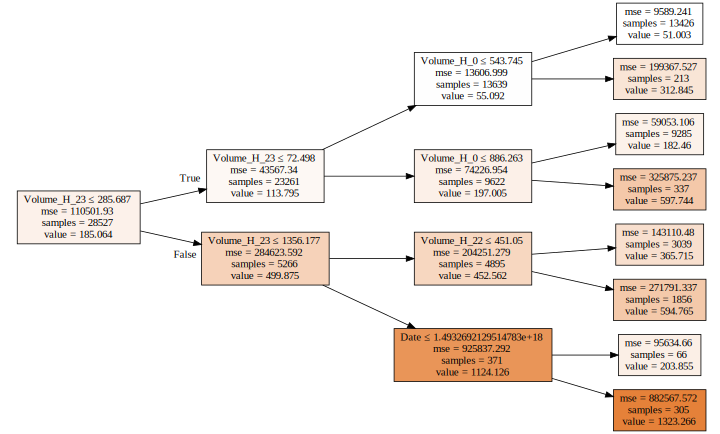

In [44]:
draw_tree(m.estimators_[0], df, precision=3)

In [45]:
m = RandomForestRegressor(n_jobs=-1) 
m.fit(X_train, y_train)  
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[114.91494241336919, 242.74643518503936, 0.8804958071573069, -0.9237512406508566]


In [46]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]
#preds take first row and print first predictions
#mean of first predictions
#actual predict   

(array([ 293.88326,  158.31776,  419.65407,   88.5185 ,  147.52351,  153.60331, 1678.63001,  649.93164,
          57.81826,   96.88035]), 374.47606902066, 176.69182551080002)

In [270]:
preds.shape

(10, 2000)

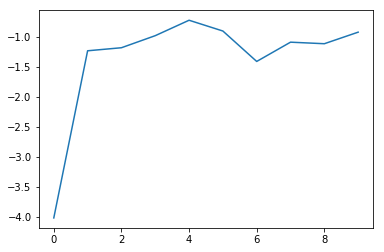

In [47]:
#plot  r2 score, going through each tree and take mean  
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [48]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[99.26992926939698, 289.32051614748394, 0.9108203917429424, -1.732761015695758, 0.34947432679609036]


In [49]:
df_trn, y_trn, nas = proc_df(a, 'Volume_X')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [50]:
len(X_train)

28527